# Face Detection with Python

## Table of Contents

### Introduction

### OpenCV
- Cascades in Practice

### Installing OpenCV

### Understanding the Code

###  Checking the Results
- What Happened?

### Extending to a Webcam

### Further Reading


## Introduction

In this article, we’ll look at a surprisingly simple way to get started with face recognition using Python and the open source library [OpenCV](http://opencv.org/).

- Do not skip the article and just try to run the code. You must understand what the code does, not only to run it properly but also to troubleshoot it.
- Make sure to use OpenCV v2.
- Have a working webcam so this script can work properly.

## OpenCV
OpenCV is the most popular library for computer vision. Originally written in C/C++, it now provides bindings for Python.

OpenCV uses machine learning algorithms to search for faces within a picture. Because faces are so complicated, there isn’t one simple test that will tell you if it found a face or not. Instead, there are thousands of small patterns and features that must be matched. The algorithms break the task of identifying the face into thousands of smaller, bite-sized tasks, each of which is easy to solve. These tasks are also called [classifiers](http://en.wikipedia.org/wiki/Statistical_classification).

For something like a face, you might have 6,000 or more classifiers, all of which must match for a face to be detected (within error limits, of course). But therein lies the problem: for face detection, the algorithm starts at the top left of a picture and moves down across small blocks of data, looking at each block, constantly asking, “Is this a face? … Is this a face? … Is this a face?” Since there are 6,000 or more tests per block, you might have millions of calculations to do, which will grind your computer to a halt.

To get around this, OpenCV uses [cascades](http://docs.opencv.org/modules/objdetect/doc/cascade_classification.html). What’s a cascade? The best answer can be found in the [dictionary](http://dictionary.reference.com/browse/cascade): “a waterfall or series of waterfalls.”

Like a series of waterfalls, the OpenCV cascade breaks the problem of detecting faces into multiple stages. For each block, it does a very rough and quick test. If that passes, it does a slightly more detailed test, and so on. The algorithm may have 30 to 50 of these stages or cascades, and it will only detect a face if all stages pass.

The advantage is that the majority of the picture will return a negative during the first few stages, which means the algorithm won’t waste time testing all 6,000 features on it. Instead of taking hours, face detection can now be done in real time.

### Cascades in Practice
Though the theory may sound complicated, in practice it is quite easy. The cascades themselves are just a bunch of XML files that contain OpenCV data used to detect objects. You initialize your code with the cascade you want, and then it does the work for you.

Since face detection is such a common case, OpenCV comes with a number of built-in cascades for detecting everything from faces to eyes to hands to legs. There are even cascades for non-human things. For example, if you run a banana shop and want to track people stealing bananas, [this guy](http://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html) has built one for that!

## Installing OpenCV
First, you need to find the correct setup file for [your operating system](http://opencv.org/releases.html).

I found that installing OpenCV was the hardest part of the task. If you get strange unexplainable errors, it could be due to library clashes, 32/64 bit differences, and so on. I found it easiest to just use a Linux virtual machine and install OpenCV from scratch.


### OpenCV Quick Start

[reference](https://docs.opencv.org/4.5.1/d7/d9f/tutorial_linux_install.html)

#### Build OpenCV core modules with opencv_contrib

```
# Install minimal prerequisites (Ubuntu 18.04 as reference)
apt update && apt install -y cmake g++ wget unzip

# Create opencv directory
mkdir -p opencv && cd opencv

# Download and unpack sources
wget -O opencv.zip https://github.com/opencv/opencv/archive/master.zip
wget -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/master.zip
unzip opencv.zip
unzip opencv_contrib.zip

# Create build directory
mkdir -p build && cd build

# Configure
cmake -DOPENCV_EXTRA_MODULES_PATH=../opencv_contrib-master/modules ../opencv-master

# Build
cmake --build .
```

#### Check build results
After successful build you will find libraries in the build/lib directory and executables (test, samples, apps) in the build/bin directory:
```
ls bin
ls lib
```

CMake package files will be located in the build root:
```
ls OpenCVConfig*.cmake
ls OpenCVModules.cmake
```

#### Install
**Warning**
> Installation process only copies files to predefined locations and do minor patching. Library installed using this method is not integrated into the system package registry and can not be uninstalled automatically. We do not recommend system-wide installation to regular users due to possible conflicts with system packages.

By default OpenCV will be installed to the /usr/local directory, all files will be copied to following locations:
- /usr/local/bin - executable files
- /usr/local/lib - libraries (.so)
- /usr/local/cmake/opencv4 - cmake package
- /usr/local/include/opencv4 - headers
- /usr/local/share/opencv4 - other files (e.g. trained cascades in XML format)

Since /usr/local is owned by the root user, the installation should be performed with elevated privileges (sudo) if not root:
```
make install
```

Installation root directory can be changed with CMAKE_INSTALL_PREFIX configuration parameter, e.g. -DCMAKE_INSTALL_PREFIX=$HOME/.local to install to current user's local directory. Installation layout can be changed with OPENCV_*_INSTALL_PATH parameters. See [OpenCV configuration options reference](https://docs.opencv.org/4.5.1/db/d05/tutorial_config_reference.html) for details.


Once you have completed the installation, you can test whether or not it works by firing up a Python session and typing:

In [1]:
import cv2

## Understanding the Code
Let’s break down the actual code, which you can download from [the repo](https://github.com/shantnu/FaceDetect/). Grab the face_detect.py script, the abba.png pic, and the haarcascade_frontalface_default.xml.

In [19]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

from matplotlib import pyplot as plt
import cv2

# Get user supplied values
imagePath = 'abba.png'
cascPath = 'haarcascade_frontalface_default.xml'

You first pass in the image and cascade names. We’ll use the ABBA image as well as the default cascade for detecting faces provided by OpenCV.

See more cascade names [here](https://github.com/opencv/opencv/tree/master/data/haarcascades).

In [20]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

Now we create the cascade and initialize it with our face cascade. This loads the face cascade into memory so it’s ready for use. Remember, the cascade is just an XML file that contains the data to detect faces.

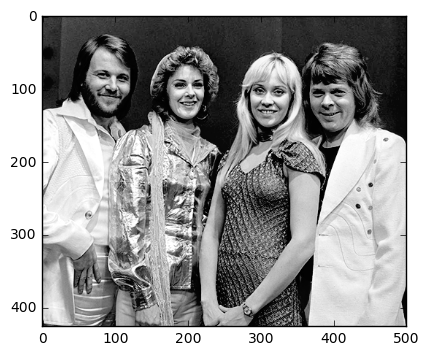

In [21]:
# Read the image
image = cv2.imread(imagePath)

# Show the image with matplotlib
plt.imshow(image)
plt.show()

In [22]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

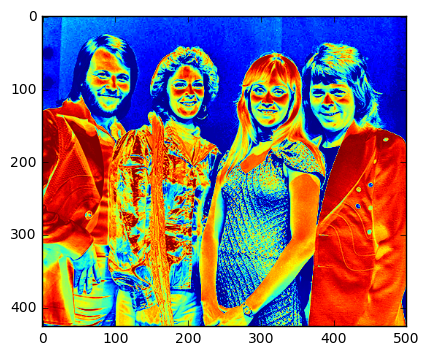

In [23]:
# Show the gray image with matplotlib
plt.imshow(gray)
plt.show()

Here we read the image and convert it to grayscale. Many operations in OpenCV are done in grayscale.

In [24]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

This function detects the actual face and is the key part of our code, so let’s go over the options:
- The [detectMultiScale](http://docs.opencv.org/modules/objdetect/doc/cascade_classification.html#cascadeclassifier-detectmultiscale) function is a general function that detects objects. Since we are calling it on the face cascade, that’s what it detects.
- The first option is the grayscale image.
- The second is the scaleFactor. Since some faces may be closer to the camera, they would appear bigger than the faces in the back. The scale factor compensates for this.
- The detection algorithm uses a moving window to detect objects. minNeighbors defines how many objects are detected near the current one before it declares the face found. minSize, meanwhile, gives the size of each window.

**Note**: I took commonly used values for these fields. In real life, you would experiment with different values for the window size, scale factor, and so on until you found one that works best for you.

The function returns a list of rectangles in which it believes it found a face. Next, we will loop over where it thinks it found something.

In [25]:
print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

Found 4 faces!


This function returns 4 values: the x and y location of the rectangle, and the rectangle’s width and height (w , h).

We use these values to draw a rectangle using the built-in rectangle() function.

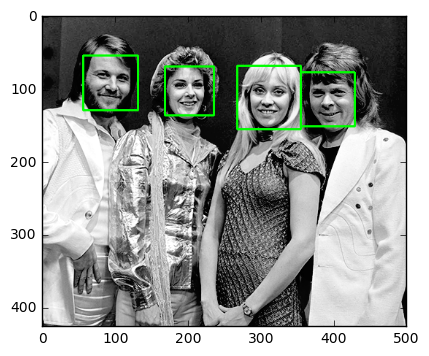

In [27]:
# Show the image with matplotlib
plt.imshow(image)
plt.show()

## Checking the Results
Let’s test against the ABBA photo:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

def face_detect(imagePath, cascPath, scaleFactor=1.1):
    # Create the haar cascade
    faceCascade = cv2.CascadeClassifier(cascPath)
    
    # Read the image
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=scaleFactor,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    print("Found {0} faces!".format(len(faces)))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)    
    
    # Show the image with matplotlib
    plt.imshow(image)
    plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Found 4 faces!


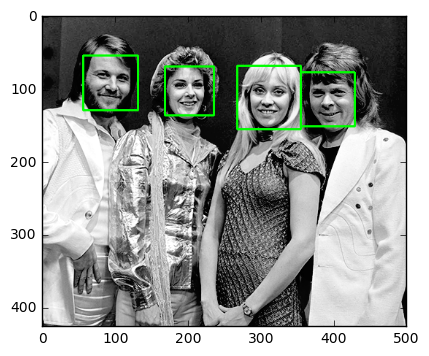

In [2]:
face_detect('abba.png', 'haarcascade_frontalface_default.xml')

That worked. How about another photo:

Found 8 faces!


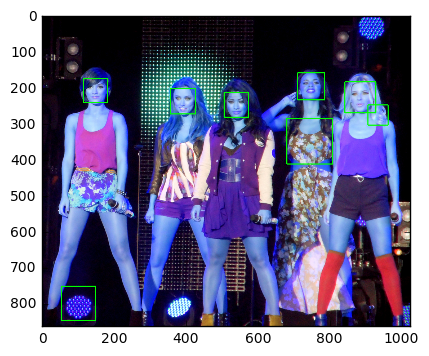

In [3]:
face_detect('The_Saturdays_in_Sept_2011.jpg', 'haarcascade_frontalface_default.xml')

That … is not a face. Let’s try again. I changed the parameters and found that setting the scaleFactor to 1.3 got rid of the wrong face.

Found 5 faces!


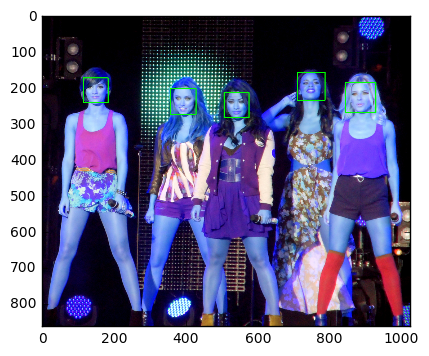

In [4]:
face_detect('The_Saturdays_in_Sept_2011.jpg', 'haarcascade_frontalface_default.xml', scaleFactor=1.3)

### What Happened?
Well, the first photo was taken fairly close up with a high quality camera. The second one seems to have been taken from afar and possibly with a mobile phone. This is why the scaleFactor had to be modified. As I said, you’ll have to set up the algorithm on a case-by-case basis to avoid false positives.

Be warned though that since this is based on machine learning, the results will never be 100% accurate. You will get good enough results in most cases, but occasionally the algorithm will identify incorrect objects as faces.

## Extending to a Webcam
What if you want to use a webcam? OpenCV grabs each frame from the webcam, and you can then detect faces by processing each frame. You will need a powerful computer, but my five-year-old laptop seems to cope fine, as long as I don’t dance around too much.

## Further Reading

[reference](https://realpython.com/face-recognition-with-python/)